In [1]:
%run ./space_syntax_with_geopandas_utils.ipynb
%run ./conn.ipynb

In [2]:
# Lê do PostGIS
gdf = gpd.read_postgis("SELECT * FROM jp_segment", con=connection)
# Lê do shapefile
# gdf = gpd.read_file("jp_segment.shp")

In [3]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 28515 entries, 0 to 28514
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   id                               28515 non-null  int64   
 1   geom                             28515 non-null  geometry
 2   depthmap_ref                     28515 non-null  int64   
 3   angular_connectivity             28515 non-null  float64 
 4   axial_line_ref                   28515 non-null  float64 
 5   connectivity                     28515 non-null  float64 
 6   inch                             28515 non-null  float64 
 7   metric_choice_r1200_metric       28515 non-null  float64 
 8   metric_choice_r500_metric        28515 non-null  float64 
 9   metric_choice_slw_r1200_metric   28515 non-null  float64 
 10  metric_choice_slw_r500_metric    28515 non-null  float64 
 11  metric_mean_depth_r1200_metric   28515 non-null  float64 
 

In [4]:
# cria o dicionário de mapa sintático
smap = make_smap(
    gdf, 
    place = "João Pessoa (PB)", 
    modeling = "Lucy Donegan (2020), Alexandre Castro (2013)", 
    source = "Lucy Donegan (2020), Alexandre Castro (2013)",
    measures = "Paulo Freitas (2020), com DepthMapX", 
    crs = {'init': 'epsg:31985'}
)

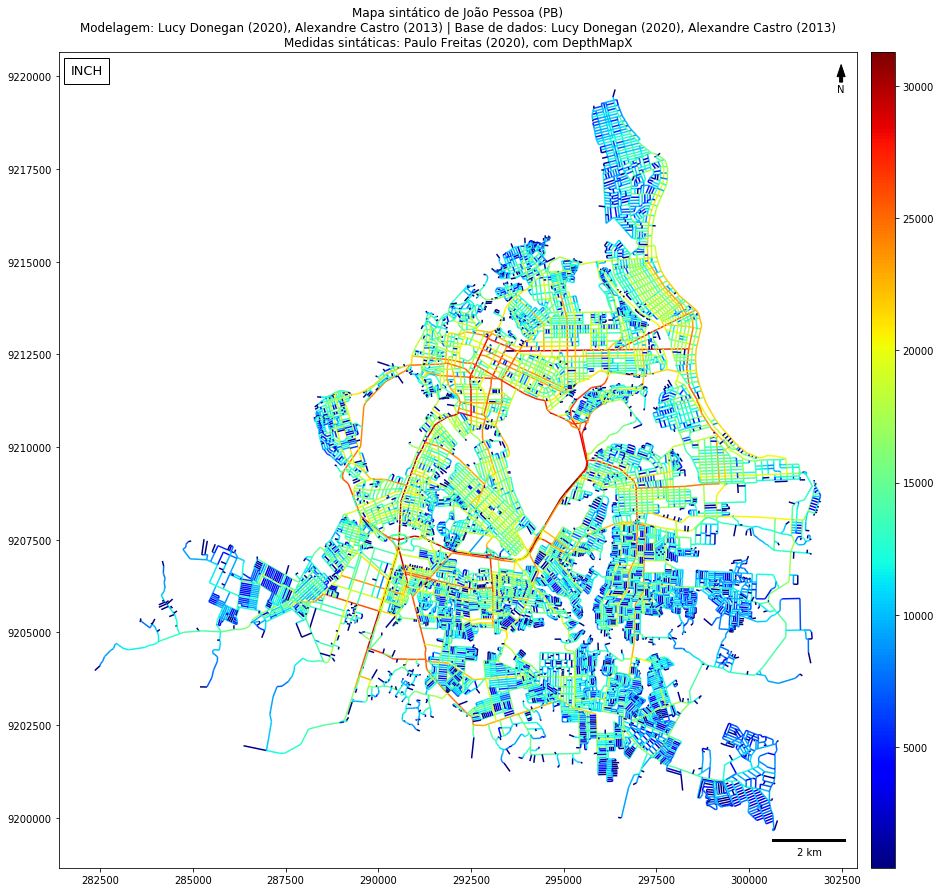

In [5]:
# plota mapa de integração tradicional
plot_syntax_map(smap)

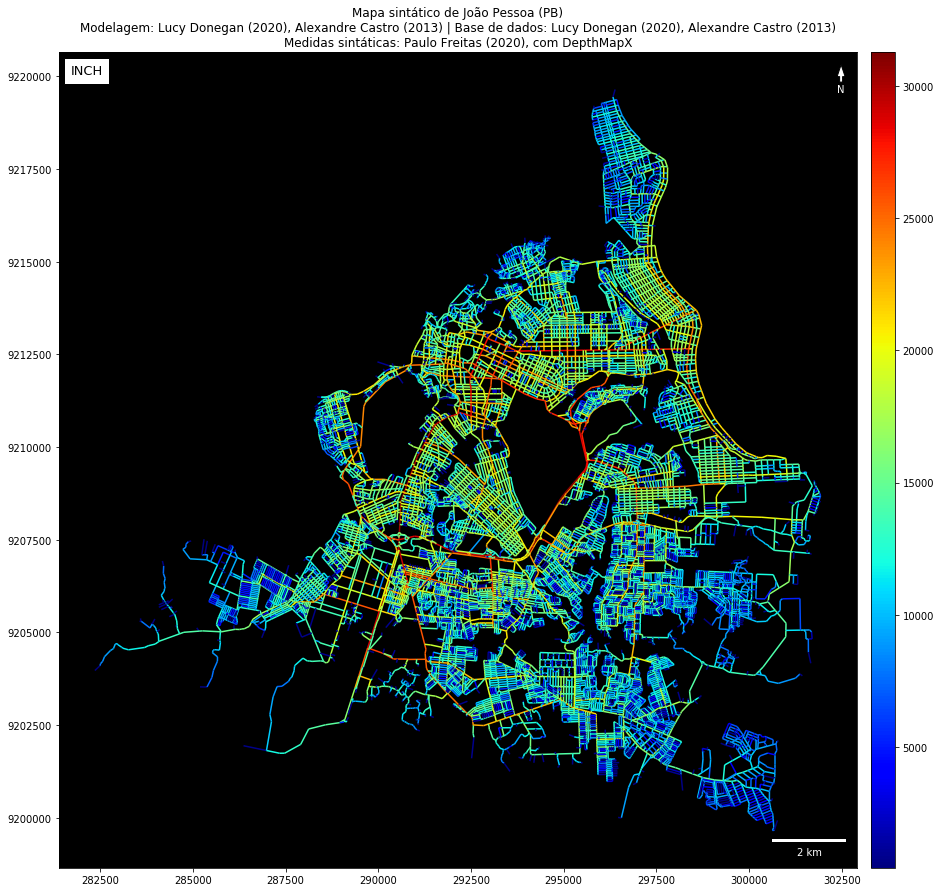

In [6]:
# plota mapa de integração com fundo preto
plot_syntax_map(smap, bg_black=True)

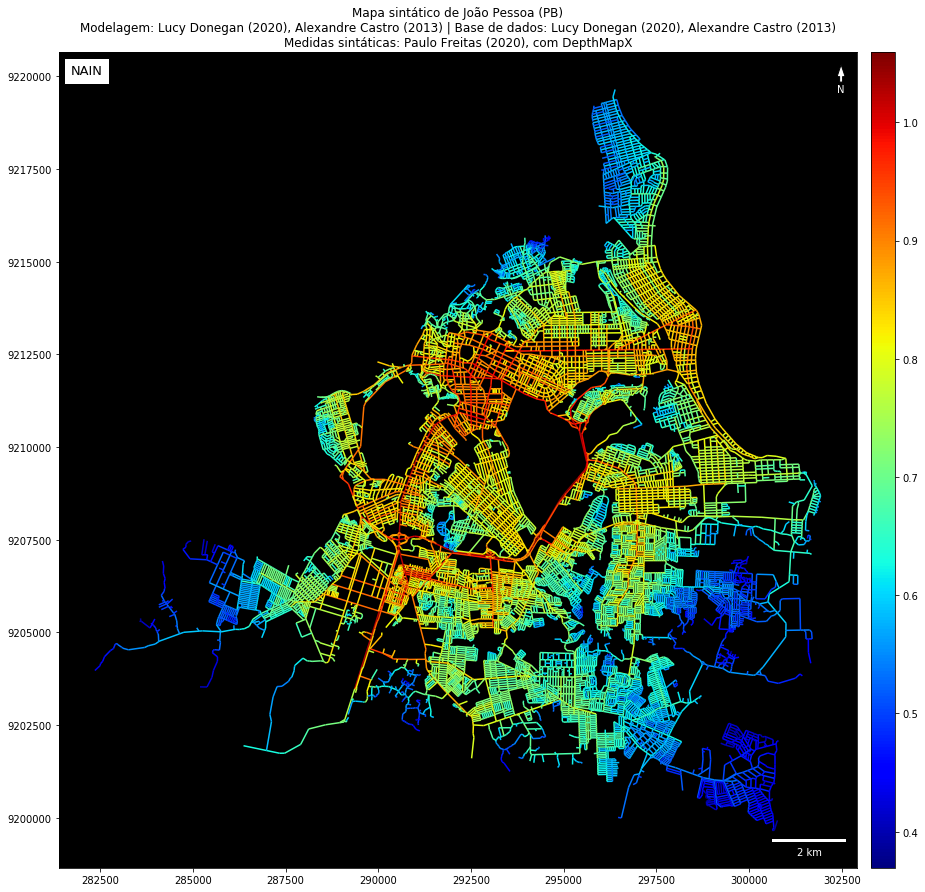

In [7]:
# plota mapa com medida diferente
plot_syntax_map(smap, column='nain', bg_black=True)

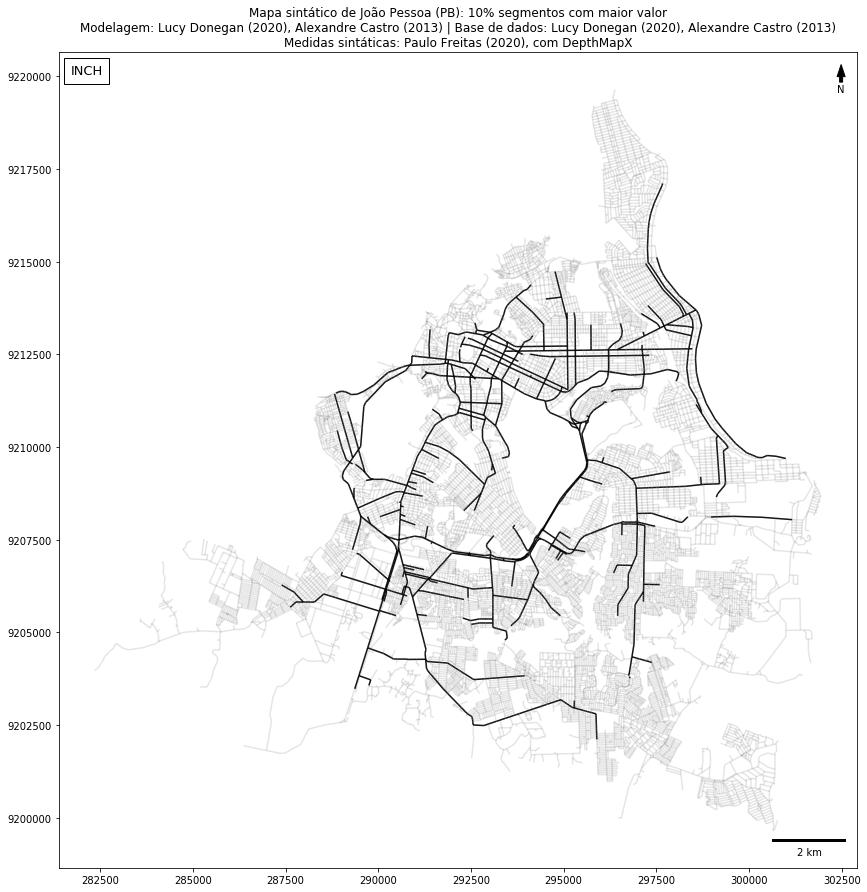

In [8]:
# plota mapa que destaca os 10% segmentos com maiores valores
plot_higher_values(smap)

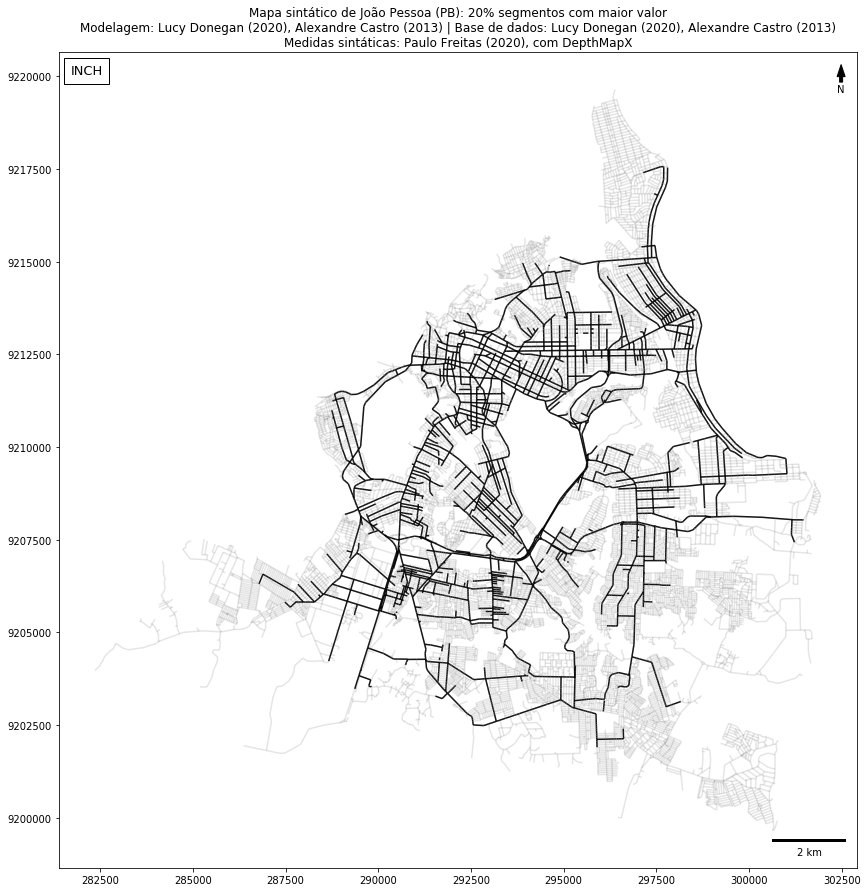

In [9]:
# plota mapa que destaca os 20% segmentos com maiores valores
plot_higher_values(smap, quantile=.8, save_as_field=True)

In [10]:
# salva como csv
smap['data'].to_csv("jp.csv", sep=";", index=False)
# salva como shapefile
smap['data'].to_file("jp.shp")

In [11]:
make_atlas(smap)

Salvo mapa para angular_connectivity
Salvo mapa para connectivity
Salvo mapa para inch
Salvo mapa para metric_choice_r1200_metric
Salvo mapa para metric_choice_r500_metric
Salvo mapa para metric_choice_slw_r1200_metric
Salvo mapa para metric_choice_slw_r500_metric
Salvo mapa para metric_mean_depth_r1200_metric
Salvo mapa para metric_mean_depth_r500_metric
Salvo mapa para metric_mean_depth_slw_r1200_met
Salvo mapa para metric_mean_depth_slw_r500_metr
Salvo mapa para metric_total_depth_r1200_metric
Salvo mapa para metric_total_depth_r500_metric
Salvo mapa para metric_total_length_r1200_metri
Salvo mapa para metric_total_length_r500_metric
Salvo mapa para metric_total_nodes_r1200_metric
Salvo mapa para metric_total_nodes_r500_metric
Salvo mapa para nach
Salvo mapa para nach_r1200m
Salvo mapa para nach_r500m
Salvo mapa para nain
Salvo mapa para nain_r1200m
Salvo mapa para nain_r500m
Salvo mapa para segment_length
Salvo mapa para t1024_choice
Salvo mapa para t1024_integration
Salvo mapa par